In [1]:
from circuits import Kinds,System
from simulator import Simulator
from math import pi as PI
from math import exp

In [2]:
def resp(v0,t,tau):
    return v0*(1-exp(-t/tau))

In [3]:
system = System()
ivs = system.add_element_of(Kinds.VS)
res = system.add_element_of(Kinds.R)
cap = system.add_element_of(Kinds.C)
system.connect(ivs.high,res.high)
system.connect(res.low,cap.high)
system.connect(cap.low,ivs.low)
R = 1e3
tau = 1e-6
step_size = tau/100
num_tau_steps = 7
stop = num_tau_steps*tau
Vpk = 10
ivs.v[0.0] = Vpk
res.a[0.0] = R
cap.a[0.0] = tau/R
trainer = Simulator(system)
trainer.run(stop,step_size,0.01,1e-15)
v_test = []
v_sol = []
for i in range(1,num_tau_steps):
    v_sol.append(cap.v_sol[tau*i])
    v_test.append(resp(Vpk,tau*i,tau))

c:\Users\terry\OneDrive\Documents\GitHub\side_circuit\ml\circuits.py:325: FutureWarning: incidence_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  M_scipy = nx.incidence_matrix(G=self.nx_graph(),oriented=True)


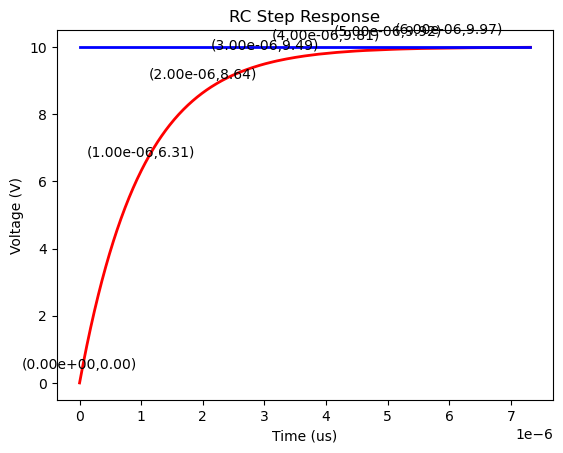

In [4]:
import matplotlib.pyplot as plt

time = []
cap_v = []
vs_v = []
for t in range(num_tau_steps):
    time.append(t*tau)
    cap_v.append(cap.v_sol[t*tau])
    vs_v.append(ivs.v_sol[t*tau])

# Plot the data
# Create the plot
fig, ax = plt.subplots()
ax.plot(cap.v_sol.keys(), cap.v_sol.values(),color='r',linewidth=2,label='Cap')
ax.plot(ivs.v_sol.keys(), ivs.v_sol.values(),color='b',linewidth=2,label='VS')


for t,v in zip(time,cap_v):
    x = "{:.2e}".format(t)
    y = "{:.2f}".format(v)
    label = f'({x},{y})'
    plt.annotate(label,(t,v),textcoords="offset points",xytext=(0,10),
                    ha='center')

# Autoscale the y axis
ax.autoscale(axis='values')

# Set the title
plt.title("RC Step Response")

# Set the x-axis label
plt.xlabel("Time (us)")

# Set the y-axis label
plt.ylabel("Voltage (V)")

# Show the plot
plt.show()

In [5]:
print(len(cap.v_sol))

787
